# <center><code style="background:orange;color:white">Boston AIRBNB Exploratory Data Analysis(EDA)</code></center>

## <code style="background:lightblue;color:white">1.Introduction</code>  
#### The datasets are about AIRBNB listings in Boston in the period 2016-2017.

## <code style="background:lightblue;color:white">2.Objectives</code>  

#### 1.Conduct a general EDA and further understand boston AIRBNB datasets 
#### 2.Implemant machine learning models - UMAP and KPrototypes
#### 3.Create visualisations

## <code style="background:lightblue;color:white">3.Preparation</code>  

### 3.1 Loading The Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import umap
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes

### 3.2 Specific Noteboook Parameters 

In [2]:
pd.set_option('max_colwidth',400)

### 3.3 Loading The Data Sets

In [3]:
airbnb_listings = pd.read_csv(r"C:\Users\gersh\Desktop\for_my_first_job\shecodes\listings.csv")
airbnb_calendar = pd.read_csv(r"C:\Users\gersh\Desktop\for_my_first_job\shecodes\calendar.csv")

### 3.4 Understanding the data 

In [4]:
unique_listings = airbnb_listings.id.nunique()
print(f"The first dataset - airbnb_listings has {airbnb_listings.shape[0]} rows and {airbnb_listings.shape[1]} columns")
print(f"The second dataset - airbnb_calendar has {airbnb_calendar.shape[0]} rows and {airbnb_listings.shape[1]} columns")
print(f"There are {unique_listings} unique listings in the examined time period")

The first dataset - airbnb_listings has 3585 rows and 17 columns
The second dataset - airbnb_calendar has 915849 rows and 17 columns
There are 3585 unique listings in the examined time period


In [5]:
airbnb_listings.sample(1)

,id,summary,host_is_superhost,host_since,host_response_time,neighbourhood,reviews_per_month,property_type,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_dollars
1744,2167993,"A fully renovated and furnished one bedroom 716 SF condo at the Historic Boston/Charlestown Navy Yard, minutes walk from the Freedom Trail, the USS Constitution, 15 minutes walk to downtown Boston, Cambridge. Public transportation on site",t,13/12/2010,within a few hours,Charlestown,1.76,Apartment,1.0,99.0,10.0,10.0,10.0,10.0,9.0,10.0,149


In [6]:
airbnb_calendar.sample(10)

,listing_id,date,price_dollars,available_category
209139,9614024,12/06/2017,NaN,0
592539,14468407,29/08/2017,$90.00,1
396376,14885796,26/07/2017,NaN,0
433720,7109689,08/03/2017,$600.00,1
688989,9607296,23/05/2017,$100.00,1
86046,12209652,27/02/2017,$500.00,1
83810,1167221,16/09/2016,$106.00,1
501358,14572100,07/12/2016,NaN,0
755869,13374617,23/07/2017,$31.00,1
459961,10119075,24/08/2017,NaN,0


#### Changing the names of 2 columns that are both named 'price_dollars' but do not share the same meaning

In [7]:
airbnb_calendar = airbnb_calendar.rename(columns = {'price_dollars':'requested_price_dollars'})
airbnb_listings = airbnb_listings.rename(columns = {'price_dollars':'price_specific_date_dollars'})

#### Changing the column name 'listing_id' to 'id' for future merging with the other dataset

In [8]:
airbnb_calendar = airbnb_calendar.rename(columns = {'listing_id':'id'})

### <code style="background:lightblue;color:white">Data Dictionary</code>  

#### airbnb_calendar
* **id** - Unique identifier for each property.
* **date** - Date identifier for a listing.
* **requested_price_dollars** - The requested price for a specific listing on a specific date.
* **available_category** - Indicator regarding the availability of a specific listing on a specific date (available_category = 1) means the listing was available for rental on a specific date but not one rented it , (available_category = 0) means the listing was available for rental and was rented.

#### airbnb_listings
* **id**  - Unique identifier for each property.
* **summary** - Text string describing the property listed, written by the host.
* **host_is_superhost** - Binary identifier whether the property owner has a superhost badge.values are T (True) or F (False).
* **host_since** - Date indicating the initial listing of the property on AirBnb
* **host_response_time** - Parameter indicating the average duration of a host's response time to a potential customer.
* **neighbourhood** - The name of the specific neighborhood in boston the listing is located at.
* **reviews_per_month** - The average amount of monthly reviews the listing receives.
* **property_type** - Parameter indicating the type of the property listed.
* **beds** - The amount of beds in the listed property.
* **review_scores_rating** - The average rating of the listing ranging between 1-100
* **review_scores_accuracy** - A score rating for the accuracy of the provided description of the property, ranging between 1-10
* **review_scores_cleanliness** - A score rating for the cleanliness of the listed property,ranging between 1-10.
* **review_scores_checkin** - A score rating for the checking-in experience in the listed property, ranging between 1-10.
* **review_scores_communication** - A score rating for the communication experience with the listing host, ranging between 1-10.
* **review_scores_location** - A score rating for the property location, ranging between 1-10.
* **review_scores_value** - A score rating quantifying of the listing's cost-value,ranging between 1-10.
* **price_specific_date_dollars** - The price paid for a specific listing on a specific date.

### 3.5 Cleanup ###

#### 3.51 Null Values

In [9]:
round((airbnb_listings.isnull().sum())/len(airbnb_listings),3)

id                             0.000
summary                        0.040
host_is_superhost              0.000
host_since                     0.000
host_response_time             0.131
neighbourhood                  0.151
reviews_per_month              0.211
property_type                  0.001
beds                           0.003
review_scores_rating           0.227
review_scores_accuracy         0.230
review_scores_cleanliness      0.228
review_scores_checkin          0.229
review_scores_communication    0.228
review_scores_location         0.229
review_scores_value            0.229
price_specific_date_dollars    0.000
dtype: float64

#### Filling out the Null Values (0.3% of the values in column) in the beds column based on the summary column

In [10]:
airbnb_listings.beds = airbnb_listings.beds.fillna(1.0)

In [11]:
round((airbnb_calendar.isnull().sum())/len(airbnb_calendar),3)

id                         0.000
date                       0.000
requested_price_dollars    0.509
available_category         0.000
dtype: float64

##### Percentage of rows that are NaN in the airbnb_calendar data 

In [12]:
prices_requested_null = (len(airbnb_calendar.loc[airbnb_calendar["requested_price_dollars"].isnull()])/len(airbnb_calendar))*100
prices_requested_null = round(prices_requested_null,2)
print(f"""{prices_requested_null}% of values in the column 'requested_price_dollars' in the airbnb_calendar dataset are null values.
That's because only listing that are available have a "requested price". """)

50.88% of values in the column 'requested_price_dollars' in the airbnb_calendar dataset are null values.
That's because only listing that are available have a "requested price". 


#### 3.52 Validating Datatypes

In [13]:
airbnb_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915849 entries, 0 to 915848
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       915849 non-null  int64 
 1   date                     915849 non-null  object
 2   requested_price_dollars  449850 non-null  object
 3   available_category       915849 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 27.9+ MB


#### Changing the datatype of column "date" from string to date

In [14]:
airbnb_calendar["date"] = pd.to_datetime(airbnb_calendar["date"],dayfirst=True)

#### Changing the datatype of column "price_dollars" from string to integar

In [15]:
airbnb_calendar["requested_price_dollars"] = airbnb_calendar["requested_price_dollars"].str[1:]
airbnb_calendar["requested_price_dollars"] = airbnb_calendar["requested_price_dollars"].fillna("0")
airbnb_calendar["requested_price_dollars"] = airbnb_calendar["requested_price_dollars"].str.split(".",1).str[0]
airbnb_calendar["requested_price_dollars"] = airbnb_calendar["requested_price_dollars"].str.replace(",",'')
airbnb_calendar["requested_price_dollars"] = airbnb_calendar["requested_price_dollars"].replace("0",np.nan)
airbnb_calendar["requested_price_dollars"] = pd.to_numeric(airbnb_calendar["requested_price_dollars"])

In [16]:
airbnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   summary                      3442 non-null   object 
 2   host_is_superhost            3585 non-null   object 
 3   host_since                   3585 non-null   object 
 4   host_response_time           3114 non-null   object 
 5   neighbourhood                3042 non-null   object 
 6   reviews_per_month            2829 non-null   float64
 7   property_type                3582 non-null   object 
 8   beds                         3585 non-null   float64
 9   review_scores_rating         2772 non-null   float64
 10  review_scores_accuracy       2762 non-null   float64
 11  review_scores_cleanliness    2767 non-null   float64
 12  review_scores_checkin        2765 non-null   float64
 13  review_scores_comm

#### Changing the datatype of column "host_since" from string to date

In [17]:
airbnb_listings["host_since"] = pd.to_datetime(airbnb_listings["host_since"],dayfirst=True)

#### 3.53 Duplicate Rows

In [18]:
len(airbnb_listings)

3585

In [19]:
airbnb_listings.nunique()

id                             3585
summary                        3113
host_is_superhost                 2
host_since                     1281
host_response_time                4
neighbourhood                    30
reviews_per_month               644
property_type                    13
beds                             11
review_scores_rating             48
review_scores_accuracy            8
review_scores_cleanliness         9
review_scores_checkin             8
review_scores_communication       7
review_scores_location            9
review_scores_value               9
price_specific_date_dollars     324
dtype: int64

In [20]:
summary_duplicates = airbnb_listings["id"].nunique()-airbnb_listings["summary"].nunique()-airbnb_listings["summary"].isnull().sum()
print(f"There are {summary_duplicates} listings that share the same summary")

There are 329 listings that share the same summary


#### Exmaple of 2 unique listings who share the same summary

In [21]:
airbnb_listings.loc[airbnb_listings["summary"]=="We are an artist collective who live in a cozy 2 family home in Jamaica Plain.., steps away from an orange line T stop! We are so excited to help travelers experience the BEST Boston has to offer: culture, comfort, and cooperative living:)"]

,id,summary,host_is_superhost,host_since,host_response_time,neighbourhood,reviews_per_month,property_type,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_specific_date_dollars
70,5601743,"We are an artist collective who live in a cozy 2 family home in Jamaica Plain.., steps away from an orange line T stop! We are so excited to help travelers experience the BEST Boston has to offer: culture, comfort, and cooperative living:)",f,2014-08-01,within a few hours,Jamaica Plain,1.46,House,1.0,82.0,8.0,7.0,9.0,9.0,9.0,8.0,46
384,5293067,"We are an artist collective who live in a cozy 2 family home in Jamaica Plain.., steps away from an orange line T stop! We are so excited to help travelers experience the BEST Boston has to offer: culture, comfort, and cooperative living:)",f,2014-08-01,within a few hours,Jamaica Plain,1.24,House,1.0,85.0,9.0,7.0,10.0,10.0,9.0,9.0,49


In [22]:
len(airbnb_calendar)

915849

In [23]:
airbnb_calendar.nunique()

id                         3585
date                        365
requested_price_dollars    1183
available_category            2
dtype: int64

In [24]:
3585*365

1308525

**Conclusion** : NOT all listings are offered to stay at year round

In [25]:
duplicated = airbnb_calendar[airbnb_calendar.duplicated()]
airbnb_calendar.loc[(airbnb_calendar.date == '2017-06-15') & (airbnb_calendar.id == 12898806)]
duplicated.loc[(airbnb_calendar.id == 12898806)]
len(duplicated) == len(duplicated.loc[(duplicated.id == 12898806)])

True

#### All the duplicated rows belong to one specific listing id - 12898806

In [26]:
airbnb_calendar.drop_duplicates(inplace= True)

In [27]:
 print(f"After removing the duplicated rows, the airbnb_calendar now has {len(airbnb_calendar)} rows")

After removing the duplicated rows, the airbnb_calendar now has 915684 rows


# <code style="background:lightblue;color:white">The Actual Analysis</code>  
### What’s the business growth trend ? 
#### Using the metric of the cumulative listings that were added to Airbnb over the years.

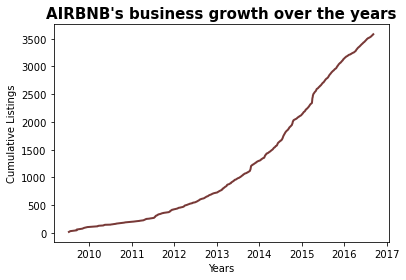

In [28]:
business_growth = airbnb_listings[['id','host_since','neighbourhood']]
business_growth = business_growth.sort_values('host_since')
business_growth_host_since = business_growth.groupby('host_since')['id'].count().reset_index()
business_growth_host_since['cumsum_listings'] = business_growth_host_since['id'].cumsum(axis = 0)
business_growth_host_since['rolling_cumsum_listings'] = business_growth_host_since['cumsum_listings'].rolling(7).mean()
plt.plot(business_growth_host_since.host_since,business_growth_host_since.rolling_cumsum_listings,color = '#783937FF',linewidth =2)
plt.xlabel('Years')
plt.ylabel('Cumulative Listings')
plt.title("AIRBNB's business growth over the years",fontweight="bold",fontsize=15)
plt.show()

conclusion: 

#### Pie chart of superhosts 

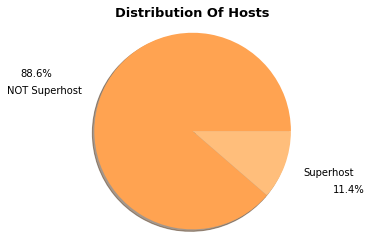

In [29]:
host = airbnb_listings.host_is_superhost.value_counts(normalize=True)
colors = ['#FFA351FF','#FFBE7BFF']
labels = ['NOT Superhost','Superhost']
plt.pie(host,labels = labels,colors = colors,autopct='%.1f%%',shadow = True,pctdistance = 1.7,labeldistance=1.2)
plt.title("Distribution Of Hosts",fontweight="bold",fontsize = 13)
plt.axis("equal")
plt.show()

#### *Conclusion* : Most of the hosts do not have the badge of superhost

type of listings

<AxesSubplot:title={'center':'Distribution of listings types'}>

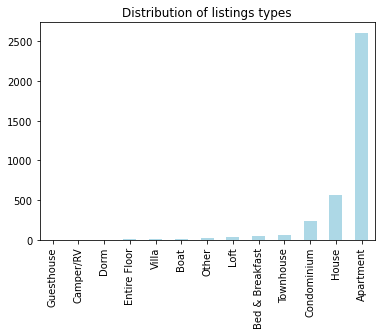

In [30]:
airbnb_listings.property_type.value_counts().sort_values().plot(kind = 'bar',title = 'Distribution of listings types',color = 'lightblue')

#### Who are the 5 most expensive neighborhoods in Boston ?

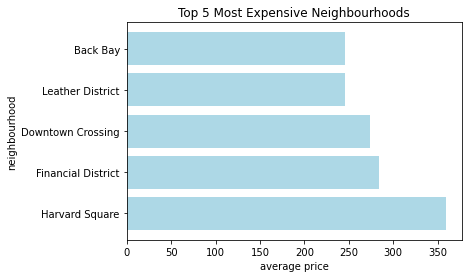

In [31]:
prices_by_neighbourhoods = airbnb_listings.groupby("neighbourhood")["price_specific_date_dollars"].mean().reset_index()
prices_by_neighbourhoods = prices_by_neighbourhoods.sort_values('price_specific_date_dollars',ascending = False,ignore_index=True)
prices_by_neighbourhoods = prices_by_neighbourhoods.rename(columns = {'price_specific_date_dollars':'avg_price_dollars'})
plt.barh(prices_by_neighbourhoods.neighbourhood[0:5],prices_by_neighbourhoods.avg_price_dollars[0:5],color='lightblue')
plt.xlabel("average price")
plt.ylabel("neighbourhood")
plt.title("Top 5 Most Expensive Neighbourhoods")
plt.show()

In [32]:
most_expensive_neighbourhood_price = max(prices_by_neighbourhoods['avg_price_dollars'])
most_expensive_neighbourhood = prices_by_neighbourhoods.loc[prices_by_neighbourhoods['avg_price_dollars'] == most_expensive_neighbourhood_price,"neighbourhood"].iloc[0]
cheapest_neighbourhood_price = min(prices_by_neighbourhoods['avg_price_dollars'])
cheapest_neighbourhood = prices_by_neighbourhoods.loc[prices_by_neighbourhoods['avg_price_dollars'] == cheapest_neighbourhood_price,"neighbourhood"].iloc[0]
print(f"The most expensive neighbourhood in Boston is {most_expensive_neighbourhood} and it costs ${most_expensive_neighbourhood_price}.")
print(f"The cheapest neighbourhood in Boston is {cheapest_neighbourhood} and it costs ${cheapest_neighbourhood_price}.")

The most expensive neighbourhood in Boston is Harvard Square and it costs $359.0.
The cheapest neighbourhood in Boston is Chestnut Hill and it costs $70.75.


#### Which neighbourhoods have the most listings? 

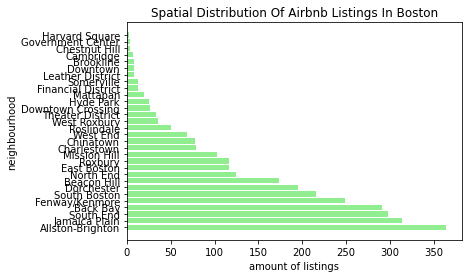

In [33]:
neighbourhoods = airbnb_listings[["neighbourhood","id"]]
neighbourhoods_count = neighbourhoods.groupby("neighbourhood").agg("count").reset_index()
neighbourhoods_count = neighbourhoods_count.rename(columns = {"id":"listings_count"})
neighbourhoods_count = neighbourhoods_count.sort_values(by = "listings_count",ascending = False)
neighbourhoods_count.head()
plt.barh(neighbourhoods_count.neighbourhood,neighbourhoods_count.listings_count,color = 'lightgreen')
plt.xlabel("amount of listings")
plt.ylabel("neighbourhood")
plt.title("Spatial Distribution Of Airbnb Listings In Boston")
plt.show()

In [34]:
label_names = ["Budget","Average","Expensive","Extravagant"]
ranges = [0,117,200,245,np.inf]
airbnb_listings["price_ranges"] = pd.cut(airbnb_listings.price_specific_date_dollars,bins = ranges,
                                                  labels = label_names)

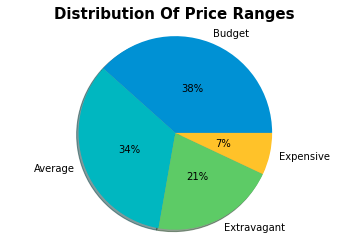

In [35]:
price_ranges = airbnb_listings.price_ranges.value_counts(normalize=True)
colors = ['#0091d4','#00b7c0','#5dcb66','#ffc229']
labels = ['Budget','Average','Extravagant','Expensive']
plt.pie(price_ranges,labels = labels,colors = colors,autopct='%1.f%%',shadow = True,pctdistance = 0.5,labeldistance=1.1)
plt.title("Distribution Of Price Ranges",fontweight="bold",fontsize = 15)
plt.axis("equal")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

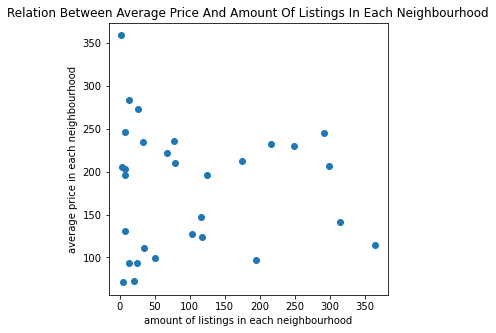

In [36]:
all_neighbourhods = pd.merge(neighbourhoods_count,prices_by_neighbourhoods,how = "left",on = 'neighbourhood')
plt.scatter(all_neighbourhods.listings_count,all_neighbourhods.avg_price_dollars)
plt.xlabel("amount of listings in each neighbourhood")
plt.ylabel("average price in each neighbourhood")
plt.title("Relation Between Average Price And Amount Of Listings In Each Neighbourhood")
plt.show()

It seems like there is no correlation between and the amount of listings in a neighbourhood and the average price of that neighbourhood.Probably because of other factors like how near it is to attractions.

The correlation between beds and price of the airbnb listings is 0.37


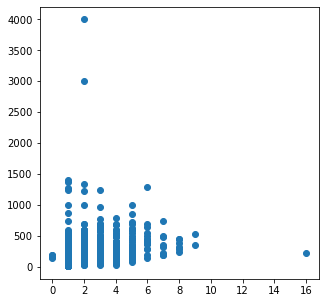

In [37]:
print(f"The correlation between beds and price of the airbnb listings is {round(airbnb_listings.beds.corr(airbnb_listings.price_specific_date_dollars),2)}")
plt.scatter(airbnb_listings.beds,airbnb_listings.price_specific_date_dollars)
plt.show()

#### There is no linear relation between amount of beds and price.For example,while most of the listing with 2 beds prices' are under 600 dollars, there is also listing with 2 beds that costs 4000 dollars.

#### Occupancy Rate 

In [38]:
airbnb_calendar = airbnb_calendar.sort_values(["date","id"])
airbnb_calendar.head(15)
#occupancy_rate
by_date = airbnb_calendar.groupby("date").agg(amount_listed_rentals = ("available_category",'count'),
                    amount_not_rented_listings=("available_category",'sum'),
                    avg_price=("requested_price_dollars","mean")).reset_index()
by_date["availabilty_rate"] = (by_date["amount_not_rented_listings"]/by_date["amount_listed_rentals"])
by_date['rolling_avg_price'] = by_date['avg_price'].rolling(14).mean()
by_date['rolling_amount_listings'] = by_date['amount_listed_rentals'].rolling(14).mean()
by_date.sample(5)

,date,amount_listed_rentals,amount_not_rented_listings,avg_price,availabilty_rate,rolling_avg_price,rolling_amount_listings
173,2017-02-26,2532,1440,180.928472,0.568720,181.796937,2513.571429
96,2016-12-11,2535,1381,187.888487,0.544773,191.173241,2508.357143
337,2017-08-09,2520,1227,198.211899,0.486905,204.046878,2518.000000
281,2017-06-14,2523,1241,197.754230,0.491875,194.688658,2504.571429
297,2017-06-30,2517,1270,202.524409,0.504569,196.997163,2505.857143


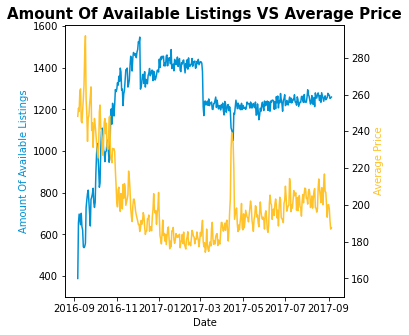

In [39]:
fig,ax = plt.subplots()
ax.plot(by_date.date, by_date.amount_not_rented_listings, color='#0091d4',linewidth=1.5)
ax.set_xlabel('Date')
ax.set_ylabel('Amount Of Available Listings',color = '#0091d4')
ax.set_ylim(bottom=300)
ax2 = ax.twinx()
ax2.plot(by_date.date,by_date.avg_price, color='#ffc229',linewidth=1.5)
ax2.set_ylim(bottom=150)
ax2.set_ylabel('Average Price',color = '#ffc229')
plt.title("Amount Of Available Listings VS Average Price",fontweight="bold",fontsize=15)
plt.show()

In [40]:
available = airbnb_calendar.sort_values(["id","date"])
available = available.groupby("id").agg(amount_days_not_rented=("available_category","sum"),amount_days_available_rent=("available_category","count")).reset_index()
available["occupancy_rate"] = 1- (available["amount_days_not_rented"]/available["amount_days_available_rent"])
available.drop(['amount_days_not_rented','amount_days_available_rent'],axis = 1,inplace = True)
available.head()
# There are listings that are not being rented at all in the time they are being offered (2016-2017)
not_rented = available[available.occupancy_rate == 0]
print(f"There are {not_rented.id.count()} listings that have not been rented in all the period they were being offred for rental")
not_rented_all_info = pd.merge(not_rented,airbnb_listings,on = "id")
not_rented_all_info.review_scores_checkin.describe()
airbnb_listings.review_scores_checkin.describe()
print("The average of all reviews for those listings that have not been rented at are lower than the average reviews of all listings")

There are 136 listings that have not been rented in all the period they were being offred for rental
The average of all reviews for those listings that have not been rented at are lower than the average reviews of all listings


#### Histogram of availability ratio

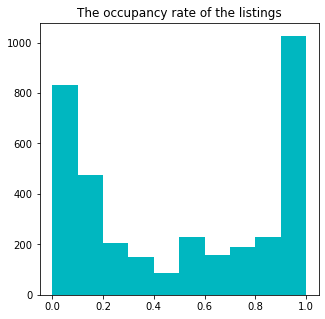

In [41]:
plt.hist(available.occupancy_rate,color='#00b7c0')
plt.title("The occupancy rate of the listings")
plt.show()

# Integrating machine learning elements: Clustering

### Numeric Features 
* **Feature 1:** beds
* **Feature 2:** price_specific_date
* **Feature 3:** review scores value
* **Feature 4:** reviews_per_month
* **Feature 5:** review_scores_rating
* **Feature 6:** review_scores_accuracy	
* **Feature 7:** review_scores_cleanliness	
* **Feature 8:** review_scores_checkin	
* **Feature 9:** review_scores_communication
* **Feature 10:** review_scores_location
* **Feature 11:** occupancy rate 
* **Feature 12:** property_age_years
### Categorial Features
* **Feature 1:** neighbourhood
* **Feature 2:** property_type
* **Feature 3:** host_is_superhost

### Clustering using Method: K-Prototypes (A mix between KModes and Kmeans methods)

#### Creating numeric and categorial data for the umap (reducing dimensions)

In [42]:
#### Creating the numeric features data ####
data_ML_numeric = airbnb_listings.copy()
data_ML_numeric = pd.merge(data_ML_numeric,available,on="id")
now = pd.Timestamp('now')
data_ML_numeric['property_age_years'] = (now - data_ML_numeric['host_since']).astype('<m8[Y]') 

# dropping columns
data_ML_numeric.drop(["summary","host_is_superhost","neighbourhood","property_type","host_response_time",
 "host_since","price_ranges"],axis =1,inplace = True)

# filling out all the na with average values
def fill_na_with_mean(columns):
    for column in columns:
        if column[0] == 'r':
            data_ML_numeric[column].fillna(data_ML_numeric[column].mean(),inplace = True)
    return data_ML_numeric

columns_list = data_ML_numeric.columns.to_list()

data_ML_numeric = fill_na_with_mean(columns_list)
data_ML_numeric.head(5)

,id,reviews_per_month,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_specific_date_dollars,occupancy_rate,property_age_years
0,12147973,1.970908,3.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,250,1.000000,7.0
1,3075044,1.300000,1.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,65,0.016260,9.0
2,6976,0.470000,1.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,65,0.143939,13.0
3,1436513,1.000000,2.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,75,0.715356,9.0
4,7651065,2.250000,2.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,79,0.078067,8.0


In [43]:
#### Creating the categorial features data  for kprototypes ####
data_ML_categorial = airbnb_listings.copy()
data_ML_categorial = data_ML_categorial[["host_is_superhost","neighbourhood","property_type","id"]]
data_ML_categorial = data_ML_categorial.dropna()

In [44]:
data_ML_categorial_umap = data_ML_categorial.copy()
data_ML_neighbourhood = pd.get_dummies(data_ML_categorial_umap.neighbourhood,prefix = 'Neighbourhood')
data_ML_property_type = pd.get_dummies(data_ML_categorial_umap.property_type,prefix = 'Property')
data_ML_superhost = pd.get_dummies(data_ML_categorial_umap.host_is_superhost,prefix = 'Superhost')
data_ML_categorial_umap = data_ML_categorial_umap.join([data_ML_neighbourhood,data_ML_property_type,data_ML_superhost])
data_ML_categorial_umap.drop(["host_is_superhost","neighbourhood","property_type"],axis=1,inplace=True)
data_ML_categorial_umap.head(5)

,id,Neighbourhood_Allston-Brighton,Neighbourhood_Back Bay,Neighbourhood_Beacon Hill,Neighbourhood_Brookline,Neighbourhood_Cambridge,Neighbourhood_Charlestown,Neighbourhood_Chestnut Hill,Neighbourhood_Chinatown,Neighbourhood_Dorchester,...,Property_Dorm,Property_Entire Floor,Property_Guesthouse,Property_House,Property_Loft,Property_Other,Property_Townhouse,Property_Villa,Superhost_f,Superhost_t
0,12147973,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3075044,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7651065,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,12386020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
data_ML_categorial_clusters = data_ML_categorial.copy()
data_ML_clusters = pd.merge(data_ML_numeric,data_ML_categorial_clusters,on= "id")
data_ML_clusters.drop("id",axis=1,inplace=True)
data_ML_clusters.head(5)

,reviews_per_month,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_specific_date_dollars,occupancy_rate,property_age_years,host_is_superhost,neighbourhood,property_type
0,1.970908,3.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,250,1.000000,7.0,f,Roslindale,House
1,1.300000,1.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,65,0.016260,9.0,f,Roslindale,Apartment
2,0.470000,1.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,65,0.143939,13.0,t,Roslindale,Apartment
3,2.250000,2.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,79,0.078067,8.0,t,Roslindale,House
4,1.700000,1.0,100.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,75,0.845865,6.0,t,Roslindale,Condominium


In [46]:
data_ML_umap = pd.merge(data_ML_numeric,data_ML_categorial_umap,on= "id")
data_ML_umap.drop("id",axis=1,inplace=True)

In [47]:
# Transforming the numeric features so that they are in the same scale
scaler = MinMaxScaler()
scaler.fit(data_ML_umap)
scaled_data = scaler.transform(data_ML_umap)
scaled_data= pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.102451,0.1875,0.898958,0.928946,0.907255,0.955787,0.941091,0.926755,0.896029,0.057789,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.067398,0.0625,0.925000,1.000000,0.875000,1.000000,1.000000,0.875000,0.875000,0.011307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.024033,0.0625,0.975000,1.000000,0.875000,1.000000,1.000000,0.875000,1.000000,0.011307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.117032,0.1250,0.987500,1.000000,1.000000,1.000000,1.000000,0.875000,1.000000,0.014824,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.088297,0.0625,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000,1.000000,0.013819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
kproto = KPrototypes(n_clusters=9, init='Cao')
clusters = kproto.fit_predict(data_ML_clusters, categorical=[12,13,14])

###  Reducing the dimensions of the data, using umap

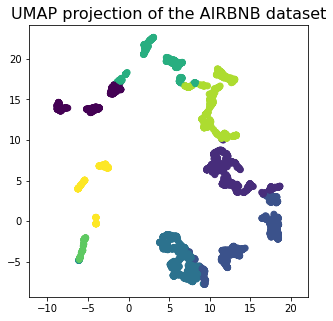

In [49]:
# Constructing a UMAP object that will do the job for us
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_ML_umap)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c =clusters)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the AIRBNB dataset', fontsize=16)
plt.show()